### OCR with Pyhton and Tesseract

#### Import the Libraries

In [125]:
import pytesseract
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [126]:
# indicate where the tesseract engine is being installed
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#### Reading the Image

In [127]:
img = cv2.imread("data/images/test01.jpg")

#### Show the image

In [128]:
cv2.imshow("Test Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [129]:
# Another way to Display Image
#from IPython.display import cv2_imshow (Its some Discussion)

In [130]:
# Default color is BGR, So its needs to Inverse the Image to BGR to RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow("BGR TO RGB", rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### One More Way display Image

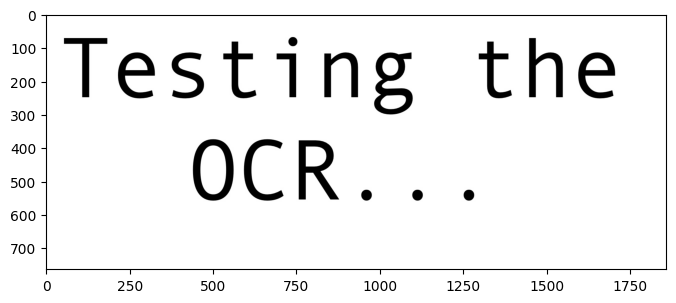

In [131]:
plt.figure(figsize=(8,6))
plt.imshow(rgb)
plt.show();

In [132]:
text = pytesseract.image_to_string(rgb)
text

'Testing the\nOCR...\n'

In [241]:
#Testing with Other language
img = cv2.imread("data/images/test02-02.jpg")

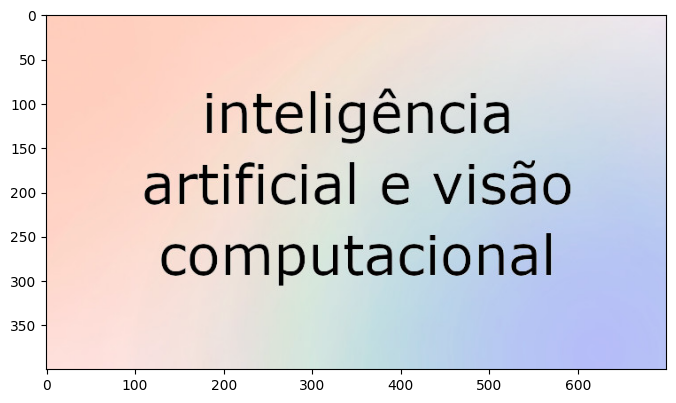

In [242]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.show()

In [243]:
def img_disply(rgb, x, y):
    plt.figure(figsize=(x,y))
    plt.imshow(rgb)
    plt.show()

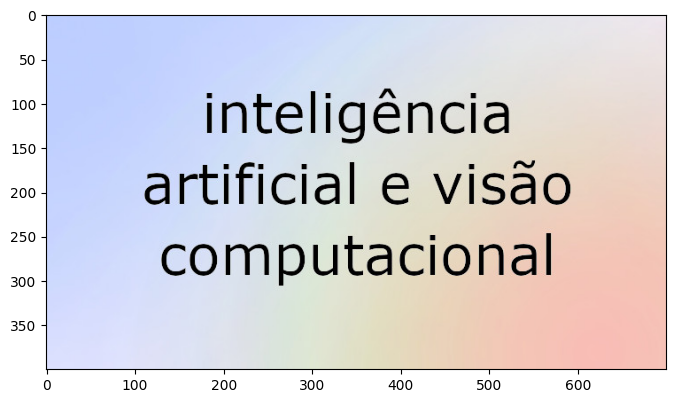

In [245]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 8,6)

In [199]:
text = pytesseract.image_to_string(rgb)
text

'inteligéncia\nartificial e visao\ncomputacional\n'

In [138]:
# Check what are the language supported by the pytesseract library
#!tesseract --list-langs

In [139]:
# !apt-get install tesseract-ocr-por # Portuguese

In [140]:
text = pytesseract.image_to_string(rgb, lang="por")
text

'inteligência\nartificial e visão\ncomputacional\n'

In [141]:
!mkdir tessdata

A subdirectory or file tessdata already exists.


In [142]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang="por", config=config_tesseract)
text

'inteligência\nartificial e visão\ncomputacional\n'

In [143]:
config_tesseract = '--tessdata-dir tessdata'

In [144]:
#!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

In [145]:
!curl -LJO https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true -O eng.traineddata

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  1 22.3M    1  320k    0     0   183k      0  0:02:05  0:00:01  0:02:04  183k
 10 22.3M   10 2384k    0     0   841k      0  0:00:27  0:00:02  0:00:25 1898k
 18 22.3M   18 4352k    0     0  1161k      0  0:00:19  0:00:03  0:00:16 2016k
 26 22.3M   26 6128k    0     0  1290k      0  0:00:17  0:00:04  0:00:13 1936k
 34 22.3M   34 7952k    0     0  1383k      0  0:00:16  0:00:05  0:00:11 1908k
 41 22.3M   41 9616k    0     0  1425k      0  0:00:16  0:00:06  0:00:10 1859k
 50 22.3M   50 11.2M    0     0  1488k      0  0:

In [105]:
!ls tessdata/

'ls' is not recognized as an internal or external command,
operable program or batch file.


#### Parameter of pytesseract

#### Page Segmentation Mode

In [146]:
# !tesseract --help-psm

In [248]:
img = cv2.imread("data/images/page-book.jpg")

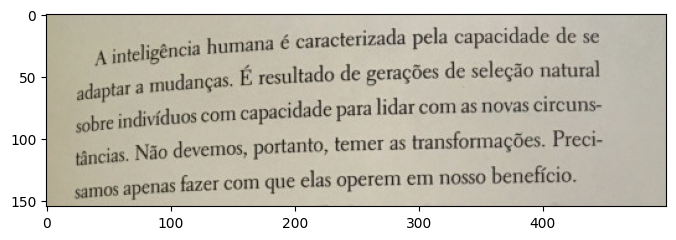

In [253]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 8, 6)

In [254]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [255]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

ª%âªªââ%%%ã%â%âêâãgêªâª%%



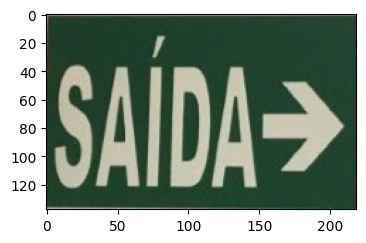

In [260]:
img = cv2.imread("data/images/exit.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 4,3)

In [266]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

SAÍDA>



#### Page Orientation

In [267]:
from PIL import Image
img = Image.open("data/images/book01.jpg")

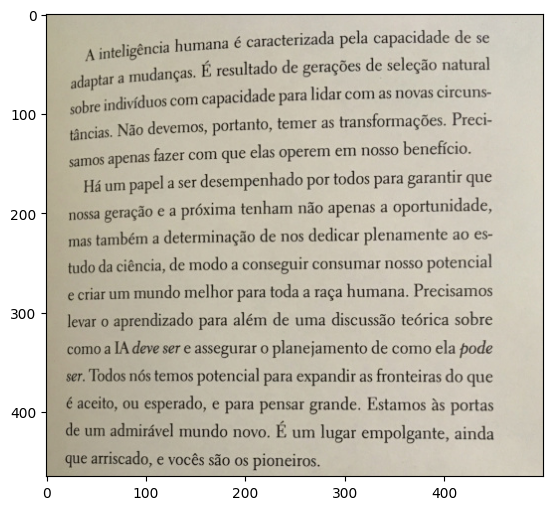

In [270]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.show()

In [271]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



#### Selection of text

In [283]:
from pytesseract import Output

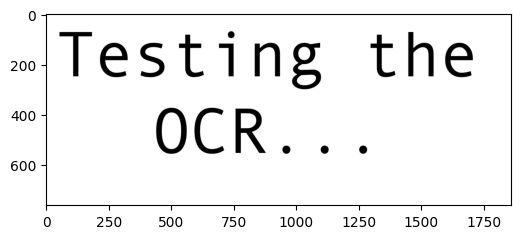

In [284]:
img = cv2.imread("data/images/test01.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 6, 8)

In [287]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='eng', output_type = Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 2],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441, 1034],
 'top': [0, 69, 69, 69, 69, 72, 375, 370, 526],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 514, 240],
 'height': [763, 489, 489, 231, 231, 180, 183, 239, 32],
 'conf': [-1, -1, -1, -1, 86, 92, -1, 88, 92],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR.', '..']}